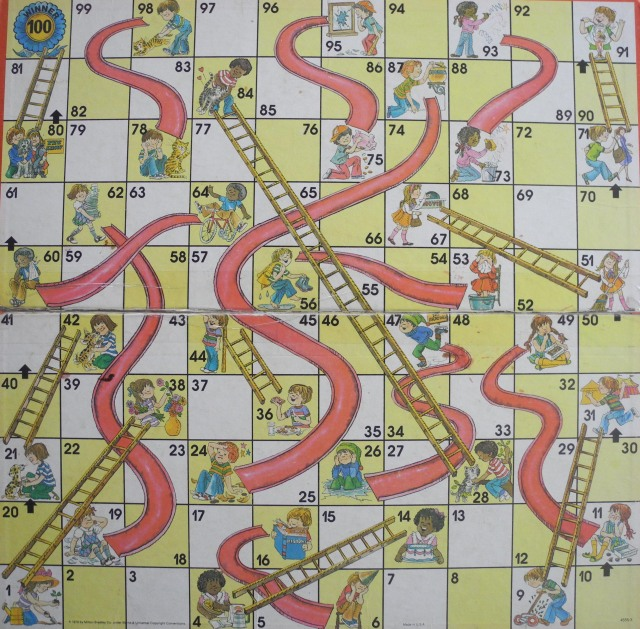

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
display.Image("./image.jpg")

In [5]:
#10 x 10 grid of 100 + 1 states, 1 extra state for outside of the board at start
n = 101
P = np.zeros((n,n))

# equal prob of moving 1-6 spaces up
for i in range(n-1):
        if i < 94 :
            P[i+1:i+7,i] = 1/6
        
        # if you roll past 100 you stay at 100
        else:
            l = i- 93
            P[i+1:100,i] = 1/6
            P[100,i] = l/6

#The winning state 
P[100,100] = 1


#reroll for rolling 6 (incomplete, would replace the for loop)

#N = int(n/6)+1
# for j in range(N):
#     for i in range(j+6):
#         P[6*j + i:6*j + i + 5,i] = (1/6)**(j+1)

#ladder edits
combo1 = np.array([[1,38],[4,14],[9,31],[21,42],[28,84],[36,44],[51,67],[71,91],[80,100]])
#slide edits
combo2 = np.array([[16,6],[47,26],[49,11],[56,53],[62,19],[64,60],[87,24],[93,73],[95,75],[98,78]])

combo = np.concatenate((combo1,combo2))

for k in combo:
    cond = (P[k[0],:] != 0.0)
    P[k[1],:][cond] += P[k[0],:][cond]
    P[k[0],:][cond]  = 0

In [8]:
# mask = np.absolute(b -1.0) > .001
num = np.array([i for i in range(101)])
# num[mask]
# df = pd.DataFrame(P)
# df.iloc[52:60,52:60]

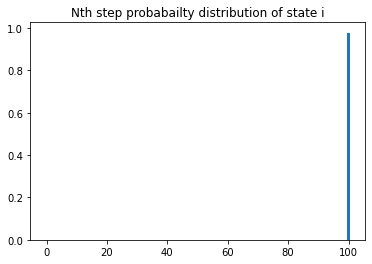

In [18]:
#iteration number of turns played
N = 100

#intialization of state off the board
x = np.zeros(101)
x[0] = 1

#storage
mean = np.zeros(N)
var = np.zeros(N)
win = np.zeros(N)

for i in range(N):
    x = np.dot(P,x)
    #average position
    mean[i] = np.sum(x*num)
    var[i] = np.sum(x*(num-mean[i])**2)
    win[i] = x[100]

plt.title('Nth step probabailty distribution of state i')
plt.bar(np.array([k for k in range(101)]),x)
plt.show()

In [612]:
#mean[1:]-mean[:-1]

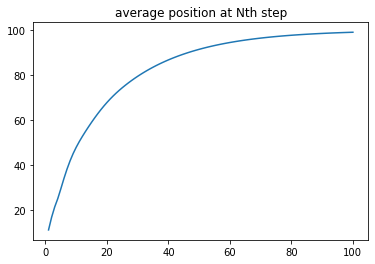

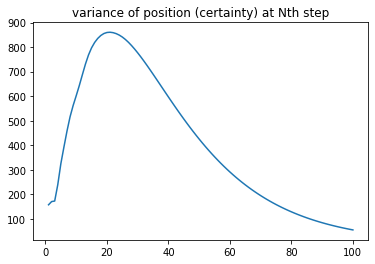

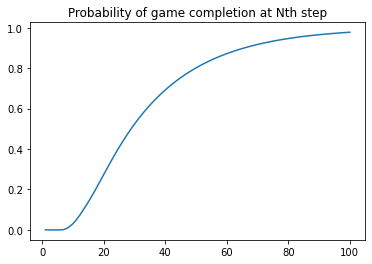

In [19]:
u = np.linspace(1,N,N)

plt.title('average position at Nth step')
plt.plot(u, mean)
plt.show()
plt.title('variance of position (certainty) at Nth step')
plt.plot(u, var)
plt.show()
plt.title('Probability of game completion at Nth step')
plt.plot(u, win)
plt.show()

In [610]:
#fundemental matrix 
N = np.linalg.inv(np.identity(100) - np.transpose(P)[:100,:100])
pd.DataFrame(N)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.0,0.0,0.166667,0.194444,0.0,0.226852,0.719331,0.217882,0.254196,0.0,...,0.431433,0.616643,0.382318,0.0,0.377554,0.0,0.301325,0.279640,0.0,0.159753
1,0.0,1.0,0.166667,0.194444,0.0,0.226852,0.764310,0.392046,0.290720,0.0,...,0.436827,0.614556,0.384656,0.0,0.379816,0.0,0.302642,0.280278,0.0,0.160456
2,0.0,0.0,1.000000,0.166667,0.0,0.194444,0.728525,0.348273,0.406318,0.0,...,0.437003,0.614488,0.384732,0.0,0.379889,0.0,0.302685,0.280299,0.0,0.160479
3,0.0,0.0,0.000000,1.000000,0.0,0.166667,0.660525,0.304532,0.355287,0.0,...,0.432223,0.616351,0.382662,0.0,0.377887,0.0,0.301520,0.279737,0.0,0.159857
4,0.0,0.0,0.000000,0.000000,1.0,0.166667,0.696941,0.310601,0.362368,0.0,...,0.431588,0.616598,0.382387,0.0,0.377621,0.0,0.301366,0.279662,0.0,0.159775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.016660,0.002777,0.003240,0.0,...,0.098961,0.104473,0.085113,0.0,0.082106,1.0,0.228442,0.250022,0.0,0.260095
96,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.014280,0.002380,0.002777,0.0,...,0.084824,0.089548,0.072954,0.0,0.070376,0.0,1.052950,0.214305,0.0,0.222939
97,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.012240,0.002040,0.002380,0.0,...,0.072706,0.076756,0.062532,0.0,0.060322,0.0,0.045386,1.040833,0.0,0.191090
98,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.0,0.166667


In [606]:
#steps required to complete game from state i
np.dot(N,np.ones(100))

array([35.83493841, 36.47573963, 36.29414456, 35.80770817, 36.07610102,
       35.90063288, 35.68926186, 35.45386578, 35.20457417, 35.25750158,
       35.31918162, 34.84782406, 34.42103573, 34.04148934, 33.70882452,
       33.2066542 , 32.26547185, 32.0196787 , 31.86030575, 31.76421101,
       31.71283564, 31.94026768, 30.04216776, 30.5449198 , 30.90406805,
       31.18764259, 31.40458338, 31.55822448, 33.81941677, 33.56143208,
       33.05895756, 32.88908979, 32.70622817, 32.48007104, 32.22072198,
       32.01352393, 32.03844423, 31.86988317, 31.60905849, 31.12312822,
       30.66462766, 30.77033562, 30.19363223, 30.85851678, 30.04411042,
       28.20754662, 27.9136243 , 26.97283885, 26.73341188, 25.0573059 ,
       25.1576723 , 26.42798618, 26.15009038, 25.75987067, 25.29685003,
       24.79118821, 25.7919116 , 24.81004712, 24.48271556, 23.41855245,
       22.51872619, 21.75721728, 19.27778786, 18.91886024, 17.95792189,
       17.03357377, 17.11976866, 17.18816381, 16.88763446, 16.76

In [594]:
#eigenvalues of probability matrix
-np.sort(-np.linalg.eig(np.transpose(P))[0])

array([ 1.00000000e+00+0.j        ,  9.57135355e-01+0.j        ,
        7.27144199e-01+0.j        ,  5.93435897e-01+0.32633782j,
        5.93435897e-01-0.32633782j,  4.93425112e-01+0.22092296j,
        4.93425112e-01-0.22092296j,  3.94566725e-01+0.65308575j,
        3.94566725e-01-0.65308575j,  3.49013477e-01+0.j        ,
        2.42185509e-01+0.59481026j,  2.42185509e-01-0.59481026j,
        1.31369100e-01+0.j        ,  1.28452196e-01+0.13528681j,
        1.28452196e-01-0.13528681j,  1.22596748e-01+0.25223794j,
        1.22596748e-01-0.25223794j,  3.93057720e-02+0.04784436j,
        3.93057720e-02-0.04784436j,  2.78614544e-03+0.05969626j,
        2.78614544e-03-0.05969626j,  2.98023448e-05+0.16815646j,
        2.98023448e-05-0.16815646j,  0.00000000e+00+0.j        ,
        0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
        0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
        0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
        0.00000000e+00+0.